# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df= pd.DataFrame(pd.read_csv("C:/Users/ASUS/JupyterNotebook/Machine Learning/Dicoding/data_output.csv"))
df

,ID_,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Clusters
0,-0.019809,-0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,2.377952,2
1,-1.051009,-1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,0
2,-0.445526,-0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,2
3,0.182737,1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,0
4,-0.081373,1.016420,1.429011,-0.673866,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1.625801,-0.151917,-0.350527,-0.673866,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,2
2212,-0.488620,-1.904422,1.429011,1.182303,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,-0.281773,-0.282705,-0.280839,3.821732,-0.117148,-0.097812,0.0,0.0,-0.420530,1
2213,0.517646,1.016420,-0.350527,-1.601951,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,2.215044,0.280829,-0.281773,3.537258,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,1
2214,0.814693,-1.069896,0.539242,1.182303,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,1.291982,-0.956381,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
X = df.drop(columns=['Clusters'])
y = df['Clusters']

# 3. Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
# 4. Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Inisialisasi model KNN
k = 5  # Jumlah tetangga
knn = KNeighborsClassifier(n_neighbors=k)

# 6. Latih model
knn.fit(X_train_scaled, y_train)

# 7. Prediksi pada data testing
y_pred = knn.predict(X_test_scaled)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.92
F1-Score: 0.92
Precision: 0.92
Recall: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       205
           1       0.85      0.87      0.86       106
           2       0.92      0.91      0.92       108
           3       0.94      0.68      0.79        25

    accuracy                           0.92       444
   macro avg       0.92      0.86      0.88       444
weighted avg       0.92      0.92      0.92       444


Confusion Matrix:
[[201   4   0   0]
 [ 11  92   2   1]
 [  0  10  98   0]
 [  0   2   6  17]]


<Figure size 800x600 with 0 Axes>

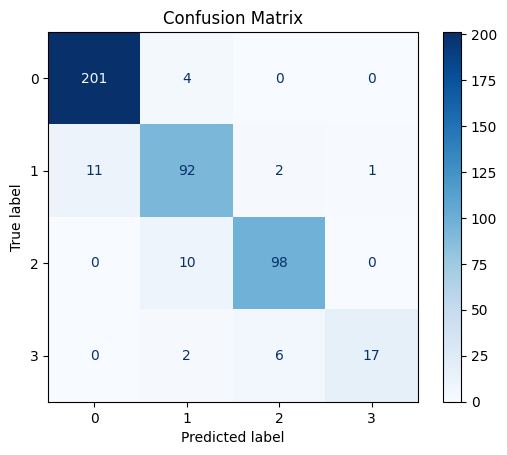

In [12]:
def calculate_metrics(y_test, y_pred):
    """
    Menghitung metrik evaluasi seperti Accuracy, F1-Score, Precision, dan Recall.

    Parameters:
    y_true (list atau numpy array): Label sebenarnya
    y_pred (list atau numpy array): Prediksi model

    Returns:
    dict: Dictionary berisi nilai metrik
    """
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred, average='weighted'),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted')
    }
    return metrics

metrics = calculate_metrics(y_test, y_pred)

# Tampilkan hasil
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [6]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [7]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan. 


3. Perbaikan Model:<br>
Mencoba algoritma klasifikasi lain yang lebih kompleks atau lebih sesuai dengan data (misalnya, SVM, ensemble methods).